# ***EARTHQUAKE PREDICTION***


## *IMPORTING NECESSARY LIBRARIES.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Needed Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/AI_ML_PROJECT/EarthQuake/earthquake1.xlsx")
data.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,20000000000000,2003.05.20,00:17:44,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,20100000000000,2007.08.01,00:03:08,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,19800000000000,1978.05.07,00:41:37,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,20000000000000,1997.03.22,00:31:45,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,20000000000000,2000.04.02,00:57:38,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


## *EXPLORATION OF DATA*

In [ ]:
data.info()   #Getting the non null value Count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  int64  
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    23997 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(10), int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
data.isnull().sum()  #Getting the null value count.

id               0
date             0
time             0
lat              0
long             0
country         10
city         12253
area         11030
direction    13945
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

In [ ]:
#Shape and Columns.

print("Columns:\n{}\n\nShape_of_the_Data: {}".format(data.columns, data.shape))

Columns:
Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

Shape_of_the_Data: (24007, 17)


## *DATA PREPROCESSING.*

In [ ]:
data.dtypes

id             int64
date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [ ]:
# We are upto Change all the Object data type into Numerical Format By applying the Label Encoder.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
      label_encoder.fit(data[col])
      data[col] = label_encoder.transform(data[col])
data.dtypes

id             int64
date           int64
time           int64
lat          float64
long         float64
country        int64
city           int64
area           int64
direction      int64
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [ ]:
data.isnull().sum()    #We can Still find that we have a Missing Values over the Distance and mw

id               0
date             0
time             0
lat              0
long             0
country          0
city             0
area             0
direction        0
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

## *Taking Care Of Missing Values.*

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values = np.nan, strategy="mean")
data[["dist","mw"]] = si.fit_transform(data[["dist","mw"]])
data.isnull().sum()

id           0
date         0
time         0
lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
dtype: int64

## *VISUALIZATION OF DATA*

In [ ]:
import plotly.express as px
px.scatter(data, x='richter',y='xm', color="direction")

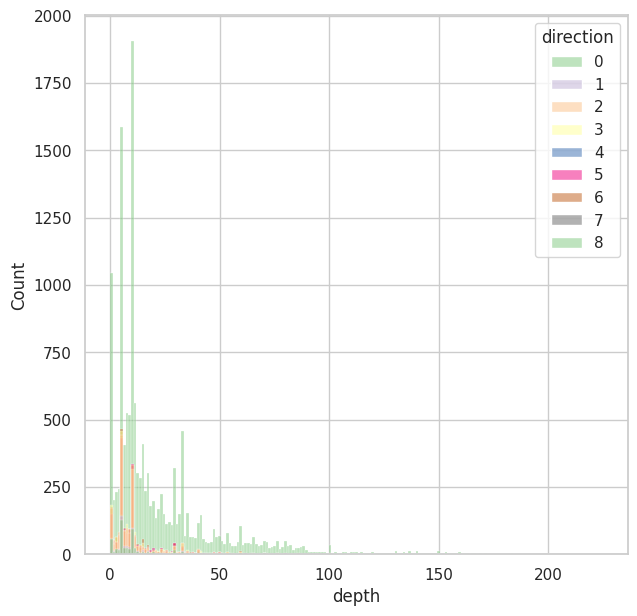

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(data=data, x='depth', hue='direction',palette ='Accent')
plt.show()

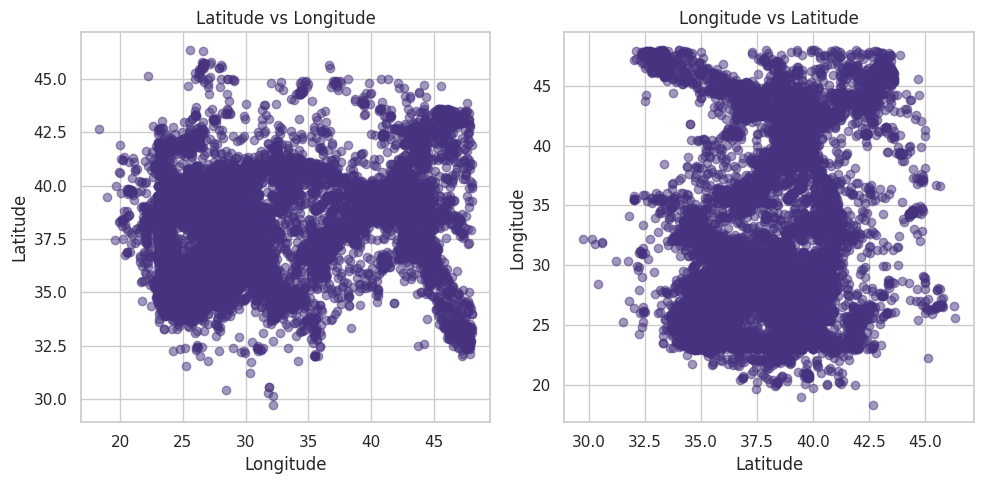

In [ ]:
plt.figure(figsize=(10, 5))

# Scatter plot for latitude
plt.subplot(1, 2, 1)
plt.scatter(data['long'], data['lat'], alpha=0.5)
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Scatter plot for longitude
plt.subplot(1, 2, 2)
plt.scatter(data['lat'], data['long'], alpha=0.5)
plt.title('Longitude vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.tight_layout()
plt.show()

<Figure size 700x700 with 0 Axes>

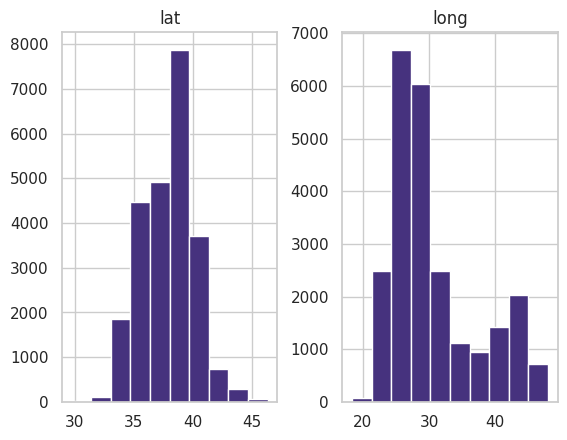

In [ ]:
plt.figure(figsize=(7,7))
data[['lat','long']].hist()
plt.show()

In [ ]:
# plt.figure(figsize=(15, 10))
# sns.countplot(data.xm)
# plt.xticks(rotation=45)
# plt.show()

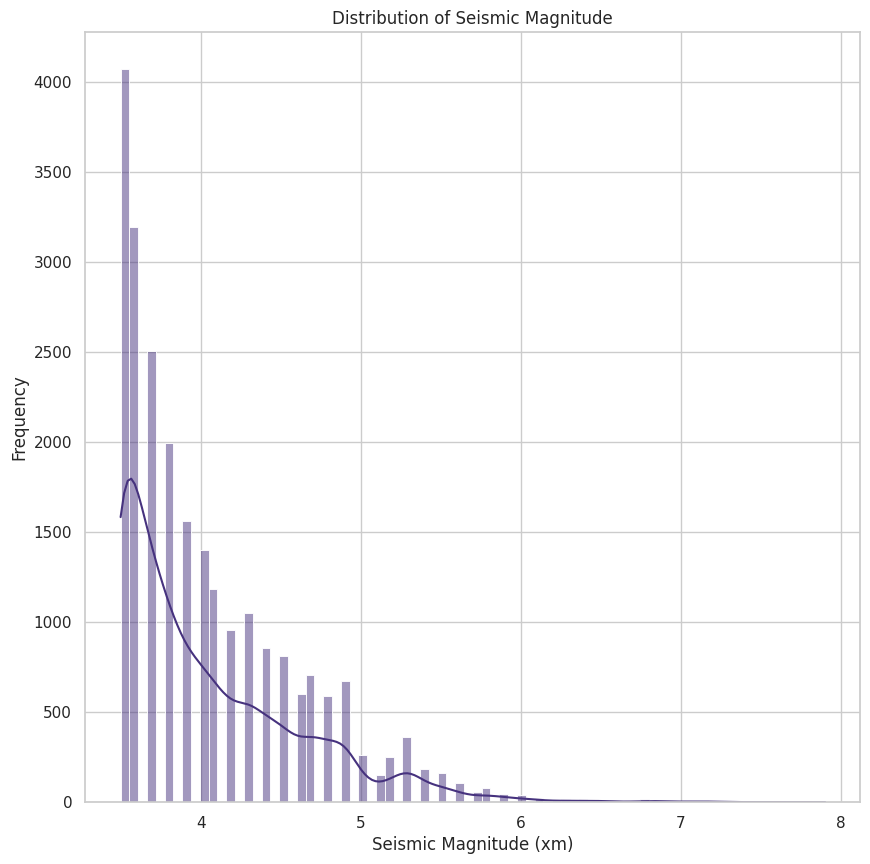

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data.xm, kde=True)
plt.title('Distribution of Seismic Magnitude')
plt.xlabel('Seismic Magnitude (xm)')
plt.ylabel('Frequency')
plt.show()

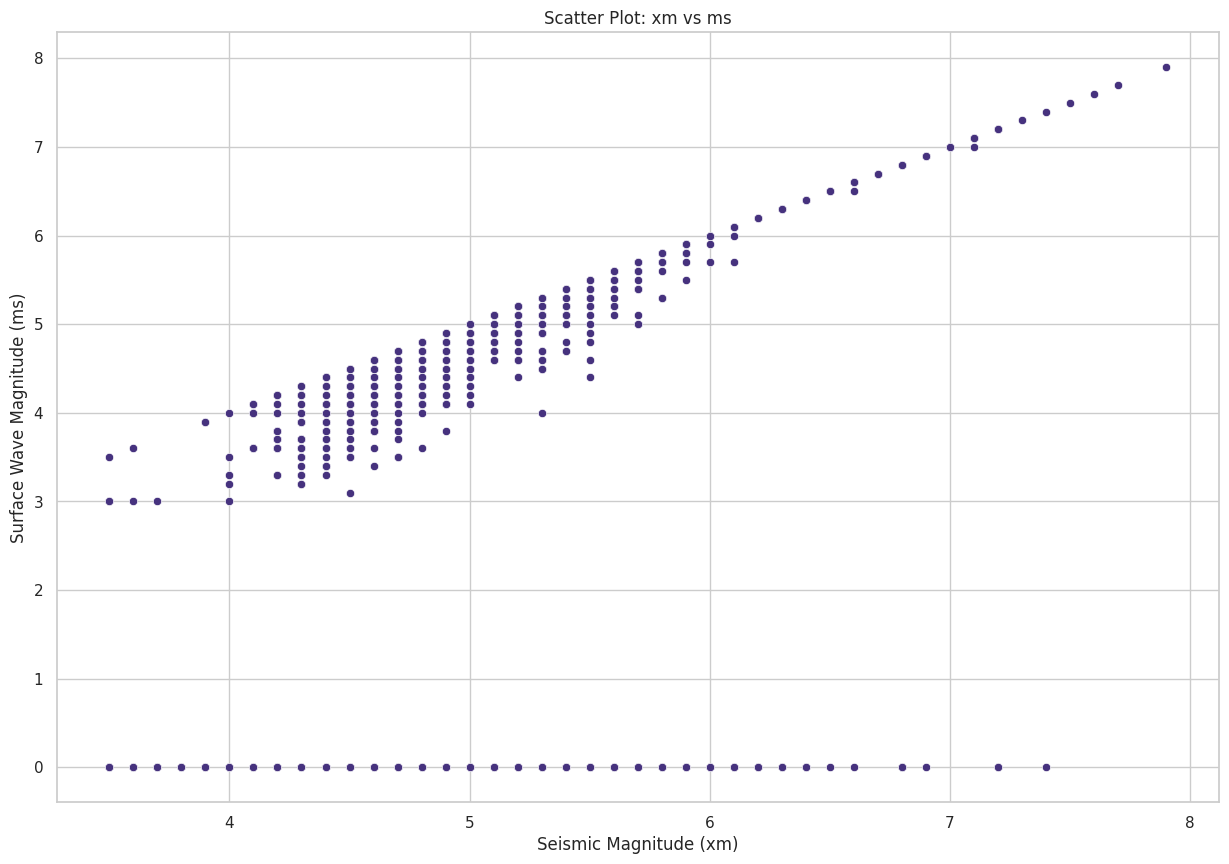

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='xm', y='ms', data=data)
plt.xlabel('Seismic Magnitude (xm)')
plt.ylabel('Surface Wave Magnitude (ms)')
plt.title('Scatter Plot: xm vs ms')
plt.show()

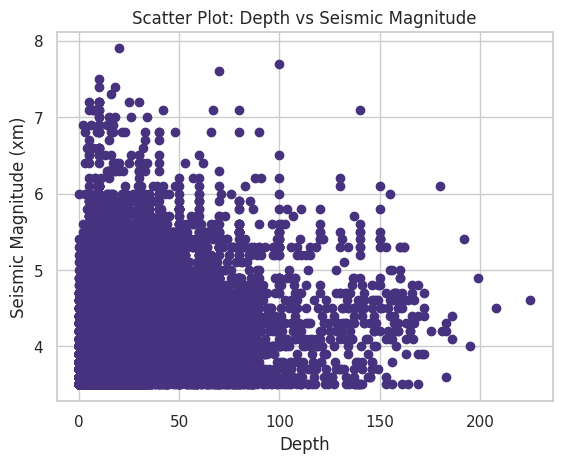

In [ ]:
plt.scatter(data.depth, data.xm)
plt.xlabel("Depth")
plt.ylabel("Seismic Magnitude (xm)")
plt.title("Scatter Plot: Depth vs Seismic Magnitude")
plt.show()

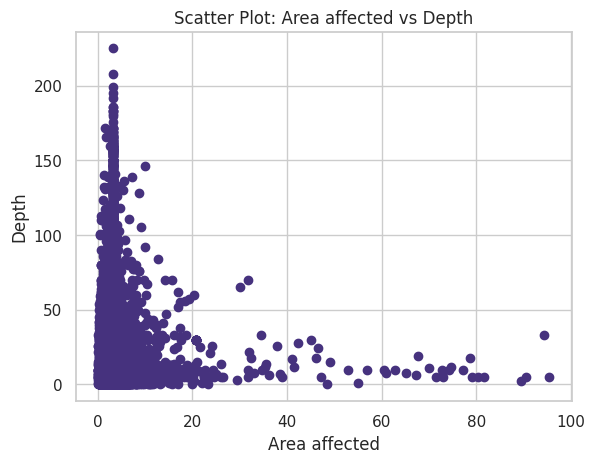

In [ ]:
plt.scatter(data.dist, data.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.title("Scatter Plot: Area affected vs Depth")
plt.show()

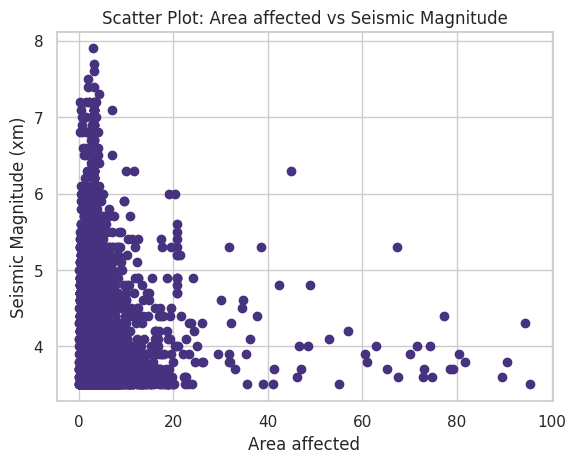

In [ ]:
plt.scatter(data.dist, data.xm)
plt.xlabel("Area affected")
plt.ylabel("Seismic Magnitude (xm)")
plt.title("Scatter Plot: Area affected vs Seismic Magnitude")
plt.show()

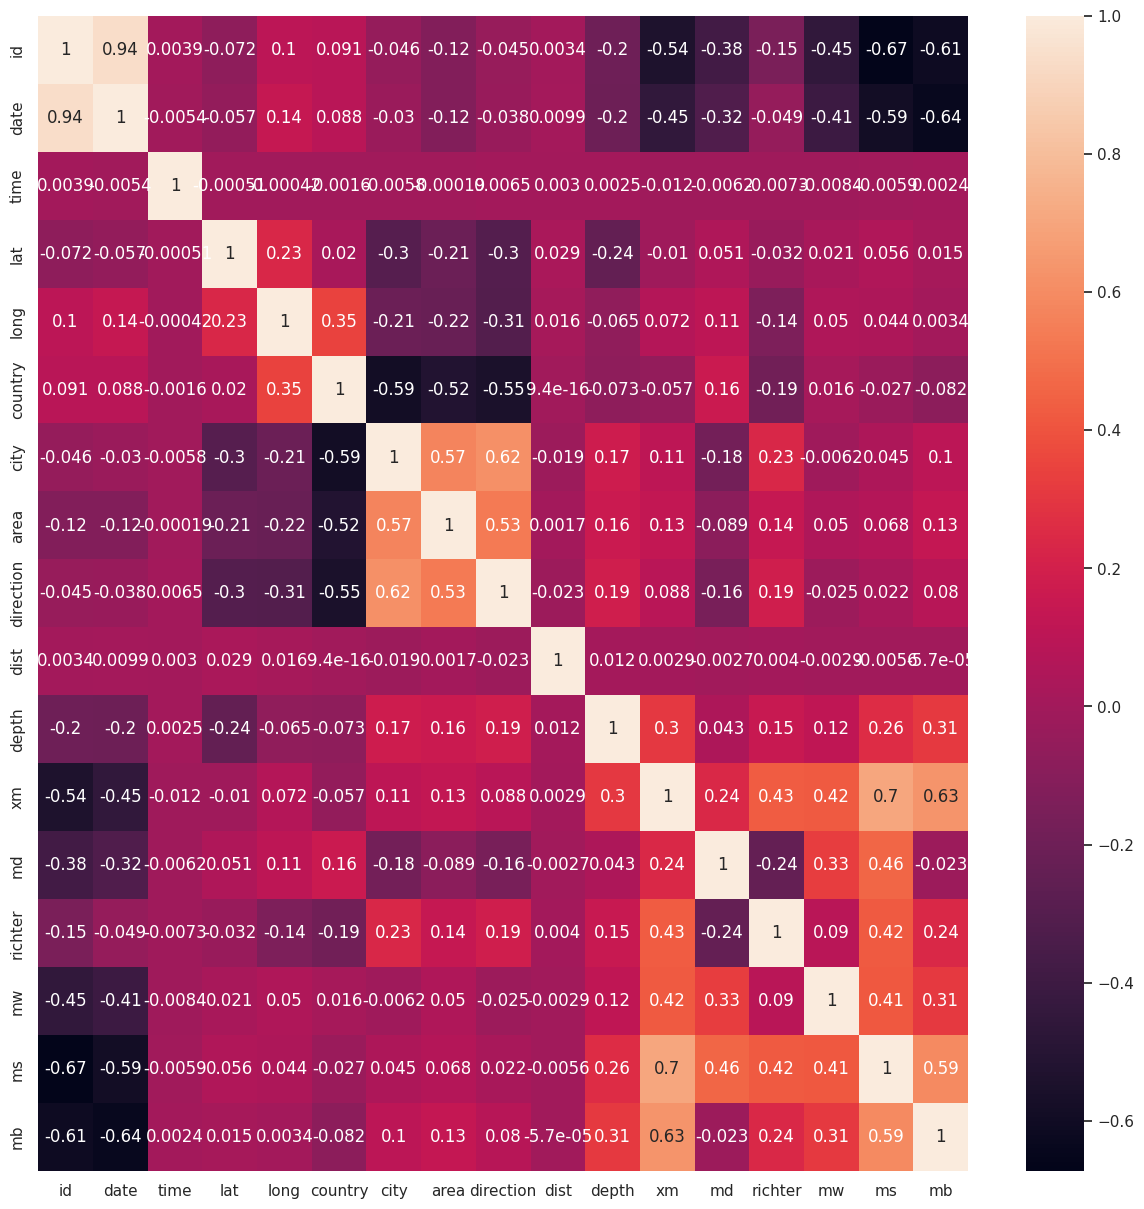

In [ ]:
plt.figure(figsize=(15,15))
dataplot=sns.heatmap(data.corr(),annot=True)
plt.show()

## *NORMALIZATION*

In [ ]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
d = scaler.fit_transform(data)
df = pd.DataFrame(d, columns=data.columns)
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.818182,0.701482,0.295575,0.559904,0.743088,0.72,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.909091,0.784562,0.052324,0.665262,0.396156,0.72,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.636364,0.270197,0.693849,0.532210,0.312542,0.72,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.818182,0.596464,0.529084,0.585792,0.610249,0.72,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.818182,0.647786,0.961035,0.665864,0.401214,0.72,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000


## *SPLITTING THE DATA*

In [ ]:
y=np.array(df['xm'])
# X=np.array(df.drop('xm',axis=1))
X=np.array(df[['lat', 'long', 'dist', 'depth', 'md', 'richter', 'mw', 'ms', 'mb', 'country', 'city', 'area']])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## *1. LINEAR REGRESSION*

In [ ]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(X_train,y_train)
ans1 = linear.predict(X_test)


### *LINEAR REGRESSION : SCORE*




In [ ]:
accuracy1=linear.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy1)

Accuracy of Linear Regression model is: 0.6309227842584417


## *LINEAR REGRESSION : ERRORS*

In [ ]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.058891666161532734
Mean Squared Error: 0.006265376586939875
Root Mean Squared Error: 0.07915413183744659


# *2. RIDGE REGRESSION*

In [ ]:
# okay an optimal way to find the alpha value for our Ridge Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso

## *Optimal Alpha Value*

In [ ]:
min_alpha_exp = -6
max_alpha_exp = 6

# Create a list of alpha values in a logarithmic scale
alpha_values = np.logspace(min_alpha_exp, max_alpha_exp, num=13)
alpha_values

cv_scores = []

In [ ]:
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Find the index with the maximum CV score
optimal_alpha_index = np.argmax(cv_scores)
optimal_alpha = alpha_values[optimal_alpha_index]


optimal_alpha

1.0

## *Applying Optimal Alpha Value*

In [ ]:
ridge = Ridge(alpha=optimal_alpha)
ridge.fit(X_train,y_train)

ans2=ridge.predict(X_test)

## *Ridge Regression : Accuracy*

In [ ]:
accuracy2=ridge.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy2)

Accuracy of Linear Regression model is: 0.6309917324261083


## *Ridge Regression : Errors*

In [ ]:
print("Ridge Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans2)))

Linear Regression
Mean Absolute Error: 0.05889094752750536
Mean Squared Error: 0.0062652527307797655
Root Mean Squared Error: 0.07915334946027089


# *3. LASSO REGRESSION*

In [ ]:
min_alpha_exp = -6
max_alpha_exp = 6

# Create a list of alpha values in a logarithmic scale
alpha_values = np.logspace(min_alpha_exp, max_alpha_exp, num=13)
alpha_values

cv_scores_lasso = []

## *Optimal Alpha Value*

In [ ]:
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    score = cross_val_score(lasso,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    cv_scores_lasso.append(np.mean(score))

# Find the index with the maximum CV score
optimal_alpha_index = np.argmax(cv_scores_lasso)
optimal_alpha_lasso = alpha_values[optimal_alpha_index]


optimal_alpha_lasso

1e-05

## *Applying Optimal Alpha Value*

In [ ]:
lasso = Lasso(alpha=optimal_alpha_lasso)
lasso.fit(X_train,y_train)

ans3=lasso.predict(X_test)

## *Lasso Regression : Accuracy*

In [ ]:
accuracy3=lasso.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy3)

Accuracy of Linear Regression model is: 0.631003630338751


## *Lasso Regression : Errors*

In [ ]:
print("Lasso Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))

Lasso Regression
Mean Absolute Error: 0.058895874532560843
Mean Squared Error: 0.006264004161016218
Root Mean Squared Error: 0.07914546203678527


# *4. DECISION TREE*

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 20)
regressor.fit(X_train,y_train)
ans4 = regressor.predict(X_test)


### *DECISION TREE : SCORE*




In [ ]:
accuracy4=regressor.score(X_test,y_test)
print("Accuracy of Decision Tree model is:",accuracy4)

Accuracy of Decision Tree model is: 0.9927194770390346


## *DECISION TREE : ERRORS*

In [ ]:
print("Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans4)))

Decision Tree
Mean Absolute Error: 0.0005868766801713838
Mean Squared Error: 9.186082933763823e-05
Root Mean Squared Error: 0.009584405528651124


# *5. KNN MODEL*

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans5 = knn.predict(X_test)


### *KNN MODEL : SCORE*




In [ ]:
accuracy5=knn.score(X_test,y_test)
print("Accuracy of KNN model is:",accuracy5)

Accuracy of KNN model is: 0.889578383069834


### *KNN MODEL : ERROR*




In [ ]:
print("KNN Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans5)))

KNN Model
Mean Absolute Error: 0.026371587596077394
Mean Squared Error: 0.0018744939646741926
Root Mean Squared Error: 0.04329542660228898


# *6. RANDOM FOREST*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=10)
reg.fit(X_train, y_train)
ans6=reg.predict(X_test)

### *RANDOM FOREST : SCORE*




In [ ]:
accuracy6=reg.score(X_test,y_test)
print("Accuracy of KNN model is:",accuracy6)

Accuracy of KNN model is: 0.9944377058034203


### *RANDOM FOREST : ERRORS*




In [ ]:
print("Random Forest Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans6))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans6)))

Random Forest Model
Mean Absolute Error: 0.0006787891408884441
Mean Squared Error: 9.442432732917742e-05
Root Mean Squared Error: 0.00971721808591211


## ***Visualization of all the Models.***

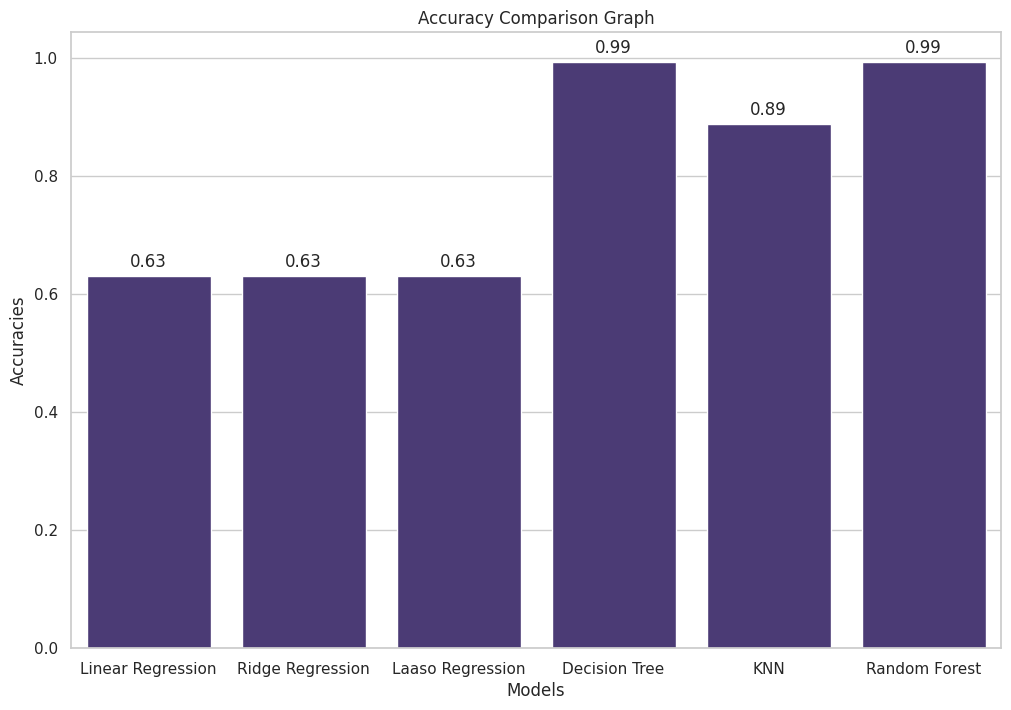

In [ ]:
models = ["Linear Regression","Ridge Regression","Laaso Regression","Decision Tree","KNN","Random Forest"]
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]

# plt.bar(models, accuracies, width=0.25)
# plt.xlabel("Models")
# plt.ylabel("Accuracies")
# plt.title("Accuracy Comparison Graph")
# plt.show()

sns.set(style="whitegrid", palette="viridis")

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
ax=sns.barplot(x=models, y=accuracies)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison Graph")

# Show the plot
plt.show()